<h1>Classifying benign/malignant cancer with data of multiple dimensions<h1>

<h3>We'll also be treating/preparing our data and learning how to reduce the amount of features without compromising our model's accuracy<h3>

In [7]:
import pandas as pd

data = pd.read_csv('exams.csv')
data.head()

,id,diagnosis,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6,exam_7,exam_8,...,exam_24,exam_25,exam_26,exam_27,exam_28,exam_29,exam_30,exam_31,exam_32,exam_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [23]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 1234 # any number
random.seed(SEED) # setting the seed for reproducibility (everytime we run the code, we get the same results)

x = data.drop(columns=['id', 'diagnosis'])
labels = data['diagnosis']

train_x, test_x, train_y, test_y = train_test_split(x, labels, test_size=0.3)

When we run the code below, we get an error

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(train_x, train_y)

model.score(test_x, test_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Our error clearly says: "*Input contains NaN, infinity or a value too large for dtype('float32')*"! It turns out, our data has some NaN values spread across it. We should deal with this first

In [26]:
data.isnull().sum() # This allows us to see how many null values (cells) are in each column

id             0
diagnosis      0
exam_1         0
exam_2         0
exam_3         0
exam_4         0
exam_5         0
exam_6         0
exam_7         0
exam_8         0
exam_9         0
exam_10        0
exam_11        0
exam_12        0
exam_13        0
exam_14        0
exam_15        0
exam_16        0
exam_17        0
exam_18        0
exam_19        0
exam_20        0
exam_21        0
exam_22        0
exam_23        0
exam_24        0
exam_25        0
exam_26        0
exam_27        0
exam_28        0
exam_29        0
exam_30        0
exam_31        0
exam_32        0
exam_33      419
dtype: int64

Woah! **419 null** values in the column "exam_33". Given that our database has 569 rows, that's **73%** of values missing for that column! Given these circumstances, it's in our best interest to simply **discard** this column entirely.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 1234 # any number
random.seed(SEED) # setting the seed for reproducibility (everytime we run the code, we get the same results)

# Separate the data into x (features) and labels
x = data.drop(columns=['id', 'diagnosis'])
labels = data['diagnosis']
x_v1 = x.drop(columns='exam_33') # Here we're creasing a new version (v1) of x with the exam_33 column removed

# Splitting our data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x_v1, labels, test_size=0.3)

# Creating a model and fitting it to the training data
model = RandomForestClassifier(n_estimators=100)
model.fit(train_x, train_y)

# Predicting the test data
score = model.score(test_x, test_y)
print("Our model's score is %.2f%%" % (score * 100))

Our model's score is 92.40%


Alright, but how good is this result? Let's compare it to a **dummy classifier**

In [46]:
from sklearn.dummy import DummyClassifier

SEED = 1234
random.seed(SEED)

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(train_x, train_y)

dummy_score = dummy_model.score(test_x, test_y)
print("The dummy model's score is %.2f%%" % (dummy_score * 100))

The dummy model's score is 61.40%


Great, so it seems that our model is indeed quite better than the dummy! This means we're good to go setting our current model as the **baseline**, and from now on we'll use it as comparison as we remove the features to decrease the data's dimensionality 

<h3>Visualizing the data<h3>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exam_1'),
  Text(1, 0, 'exam_2'),
  Text(2, 0, 'exam_3'),
  Text(3, 0, 'exam_4'),
  Text(4, 0, 'exam_5'),
  Text(5, 0, 'exam_6'),
  Text(6, 0, 'exam_7'),
  Text(7, 0, 'exam_8'),
  Text(8, 0, 'exam_9'),
  Text(9, 0, 'exam_10')])

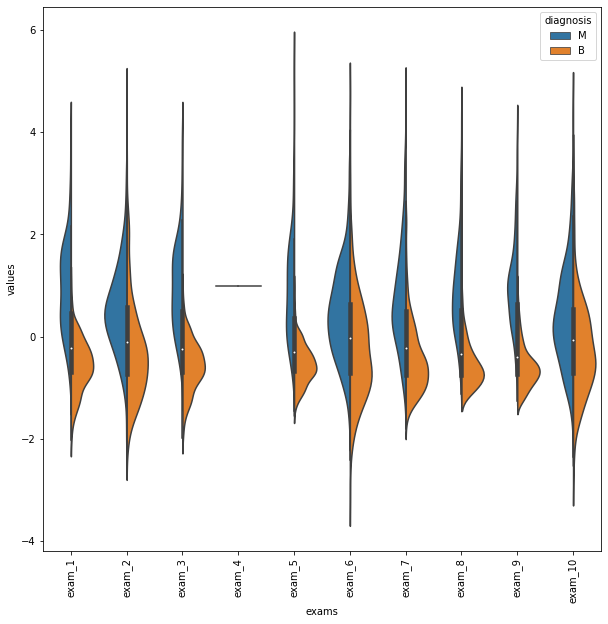

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# For the sake of visualization, we're going to scale the data
standardizer = StandardScaler()
standardizer.fit(x_v1)
x_v2 = standardizer.transform(x_v1) # Returns a numpy array
x_v2 = pd.DataFrame(data=x_v2, columns=x_v1.keys())

# Creating a new datafram structured to fit the violin plot
plot_data = pd.concat([labels, x_v2.iloc[:,0:10]], axis = 1)
plot_data = pd.melt(plot_data, id_vars = 'diagnosis', var_name = 'exams', value_name = 'values')

plt.figure(figsize=(10, 10))
sns.violinplot(x = 'exams', y = 'values', hue = 'diagnosis', data = plot_data, split = True)

plt.xticks(rotation = 90) # This rotates the x-axis labels

Already we can notice something: "exam_4" column has no variance! It becomes even more clear when we count the different values in it:

In [61]:
x_v2['exam_4'].value_counts()

1.0    569
Name: exam_4, dtype: int64

There are no different values, it's all the same (= 1.0)! Clearly this column will do us no favor, so we can just go ahead and drop this column from out features set as well. 